In [1]:
from rapidminer_go_python import rapidminergoclient as rmgo
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
LABEL_ATTRIBUTE = "FutureCustomer"
DATA_ID = 'id'
AUTOMODEL_URL = "https://go.rapidminer.com"
USER_ID = ""
PASSWORD = ""
selection_criteria = 'performance_accuracy'
analysis_name = 'Deals'
AUTODEPLOY = True
max_min_crietria_selector = 'max'

In [3]:
data = pd.read_csv("C:\\Users\\VenkateshkumarSivaku\\Desktop\\Interactive data\\Deals-Training.csv")

In [4]:
#To get the RapidminerGo instance
client = rmgo.RapidMinerGoClient(AUTOMODEL_URL, USER_ID, PASSWORD)

password found
Successfully connected to the Server


# Quick Training:

In [5]:
client.quick_automodel(data,LABEL_ATTRIBUTE,AUTODEPLOY,selection_criteria,max_min_crietria_selector, analysis_name)

Successfully uploaded data
Please remember the following file ID
2e95d8c3-ad1f-419a-9583-81554cf275c4
2e95d8c3-ad1f-419a-9583-81554cf275c4
Successfully created modeling task
{'id': 'd997d286-5325-465e-9479-0f4611b137d2', 'ownerId': 'cf8f9e19-5936-4ff5-9085-283f82f77fc7', 'dataId': '2e95d8c3-ad1f-419a-9583-81554cf275c4', 'dataName': 'Deals.json', 'createdAt': 'Mar 25, 2020 9:04:43 PM', 'displayName': 'Predicting ${label} in Deals.json', 'deployedModels': []}
Successfully set Target Label!
Starting execution
Got execution result for   WEIGHTS
Got execution result for   NAIVE_BAYES
Got execution result for   GLM
Got execution result for   LOGREG
Got execution result for   DEEP_LEARNING
Got execution result for   DECISION_TREE
Got execution result for   RANDOM_FOREST
Got execution result for   GBT
Got execution result for   SVM
Got execution result for   FLM
Inside determine_best_model function
['performance', 'percentages', 'accuracy']
check model : WEIGHTS
Wrong feature:performance not a

{'Modeling_ID': 'd997d286-5325-465e-9479-0f4611b137d2',
 'DeploymentID': 'cc661a58-7254-4f34-9fd6-a3081899eccb',
 'Deployment_Status': 'Success',
 'Deployed_Model': 'GBT',
 'URL': 'https://go-develop.rapidminer.com/am/modeling/d997d286-5325-465e-9479-0f4611b137d2/results'}

# Training:

In [6]:
dataId = client.upload_json(data, analysis_name)[DATA_ID]
modelingTaskID = client.create_modeling_task(dataId)[DATA_ID]

Successfully uploaded data
Please remember the following file ID
63a58d18-b7dc-4879-a989-abb2c0e035e1
Successfully created modeling task


In [7]:
client.set_label(modelingTaskID, LABEL_ATTRIBUTE)

Successfully set Target Label!


In [8]:
client.set_class_interest(modelingTaskID, 'Yes', 'No')

Success set class of interest!


In [9]:
jsonVal = client.set_cost_matrix(modelingTaskID, [[1, -1], [-1, 1]])

Success! Cost Matrix updated


In [10]:
#setting label
dataInputs = json_normalize(jsonVal['modelInputs'])
dataInputs

,attributeName,selected,modelAttributeStatistics.correlation,modelAttributeStatistics.idness,modelAttributeStatistics.stability,modelAttributeStatistics.missingness,modelAttributeStatistics.status,modelAttributeStatistics.qualityTag
0,PaymentMethod,True,16.75%,0.30%,65.20%,0.00%,GREEN,OK
1,Gender,True,22.51%,0.20%,55.00%,0.00%,GREEN,OK
2,Age,True,28.17%,?,2.90%,0.00%,GREEN,OK


In [11]:
# Initiating model training
client.start_execution(modelingTaskID)

print('Please wait for the process to complete')

# Obtaining the trained model results
allResults = client.get_execution_result(modelingTaskID)

print('Process completed')

Please wait for the process to complete
Got execution result for   WEIGHTS
Got execution result for   NAIVE_BAYES
Got execution result for   GLM
Got execution result for   LOGREG
Got execution result for   DEEP_LEARNING
Got execution result for   DECISION_TREE
Got execution result for   RANDOM_FOREST
Got execution result for   GBT
Got execution result for   SVM
Got execution result for   FLM
Process completed


In [12]:
selection_criteria = 'jupyter_interactive'

#Performance Result values of each model
jsontoDf = client.resultPerformancePercentageView(selection_criteria)
jsontoDf

check:NAIVE_BAYES
check:GLM
check:LOGREG
check:DEEP_LEARNING
check:DECISION_TREE
check:RANDOM_FOREST
check:GBT
check:SVM
check:FLM


,f_measure,recall,precision,specificity,accuracy,sensitivity,classification_error,AUC,Model
0,94.95%,90.40%,100.00%,100.00%,95.79%,90.40%,4.21%,0.992,NAIVE_BAYES
1,97.41%,95.79%,99.13%,99.41%,97.56%,95.79%,2.44%,0.999,GLM
2,97.07%,94.34%,100.00%,100.00%,97.21%,94.34%,2.79%,1.000,LOGREG
3,97.74%,96.42%,99.13%,99.41%,97.91%,96.42%,2.09%,0.999,DEEP_LEARNING
4,93.12%,97.34%,89.39%,89.12%,93.02%,97.34%,6.98%,0.974,DECISION_TREE
5,95.55%,91.60%,100.00%,100.00%,95.81%,91.60%,4.19%,1.000,RANDOM_FOREST
6,98.55%,97.15%,100.00%,100.00%,98.60%,97.15%,1.40%,1.000,GBT
7,96.09%,92.53%,100.00%,100.00%,96.51%,92.53%,3.49%,0.996,SVM
8,88.74%,79.91%,100.00%,100.00%,90.88%,79.91%,9.12%,0.991,FLM


In [13]:
dataInputs

,attributeName,selected,modelAttributeStatistics.correlation,modelAttributeStatistics.idness,modelAttributeStatistics.stability,modelAttributeStatistics.missingness,modelAttributeStatistics.status,modelAttributeStatistics.qualityTag
0,PaymentMethod,True,16.75%,0.30%,65.20%,0.00%,GREEN,OK
1,Gender,True,22.51%,0.20%,55.00%,0.00%,GREEN,OK
2,Age,True,28.17%,?,2.90%,0.00%,GREEN,OK


In [14]:
#String to float conversion and removes '%' from the data frame values
dataInputs = client.rapidDataFrameNormalizer(dataInputs)

attributeName has string values so couldn't convert all its values to numbers
idness has string values so couldn't convert all its values to numbers
status has string values so couldn't convert all its values to numbers
qualityTag has string values so couldn't convert all its values to numbers


In [15]:
dataInputs

,attributeName,selected,correlation,idness,stability,missingness,status,qualityTag
0,PaymentMethod,1.0,16.75,0.30,65.2,0.0,GREEN,OK
1,Gender,1.0,22.51,0.20,55.0,0.0,GREEN,OK
2,Age,1.0,28.17,?,2.9,0.0,GREEN,OK


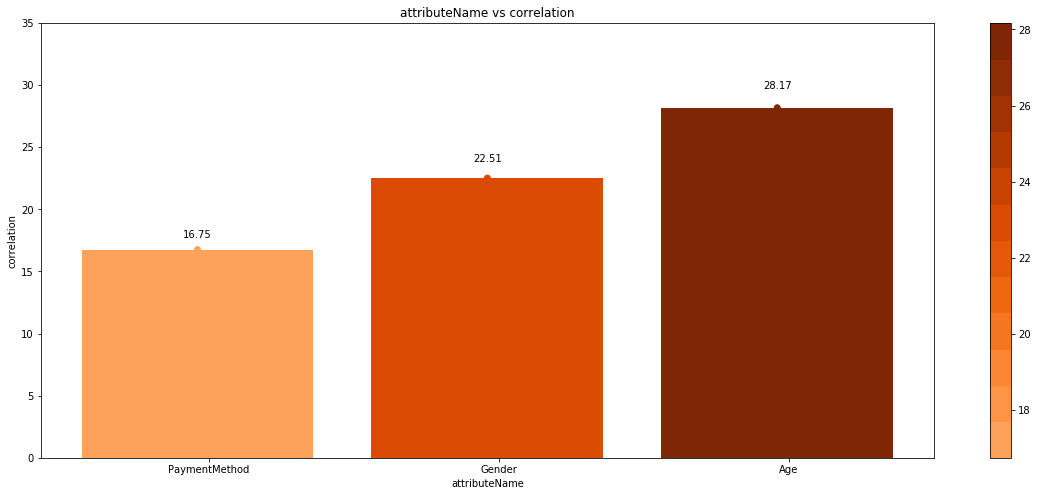

In [16]:
#client.plotBarGraph(input_DataFrame, x-axis, y-axis, color segmentation, y-axis max val, width, height)
client.plotBarGraph(dataInputs, 'attributeName', 'correlation', 8, 35, 20,8).show()

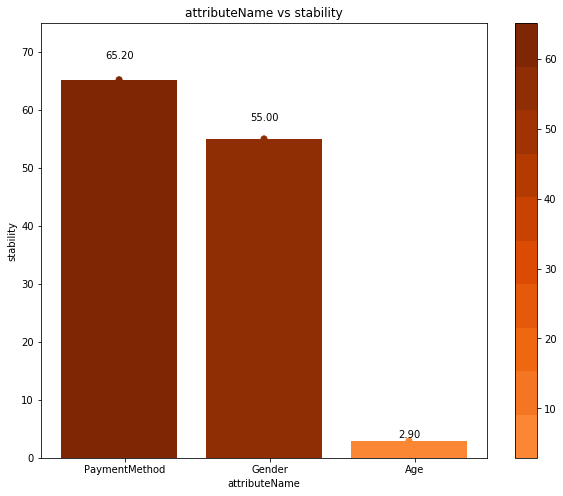

In [17]:
client.plotBarGraph(dataInputs, 'attributeName', 'stability', 10, 75, 10,8).show()

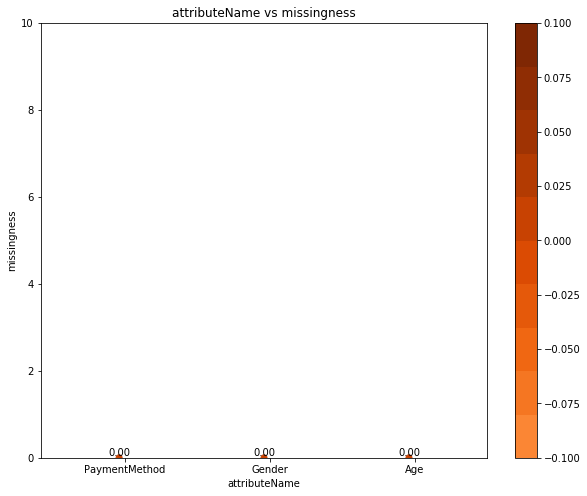

In [18]:
client.plotBarGraph(dataInputs, 'attributeName', 'missingness', 10, 10, 10,8).show()

In [19]:
jsontoDf

,f_measure,recall,precision,specificity,accuracy,sensitivity,classification_error,AUC,Model
0,94.95%,90.40%,100.00%,100.00%,95.79%,90.40%,4.21%,0.992,NAIVE_BAYES
1,97.41%,95.79%,99.13%,99.41%,97.56%,95.79%,2.44%,0.999,GLM
2,97.07%,94.34%,100.00%,100.00%,97.21%,94.34%,2.79%,1.000,LOGREG
3,97.74%,96.42%,99.13%,99.41%,97.91%,96.42%,2.09%,0.999,DEEP_LEARNING
4,93.12%,97.34%,89.39%,89.12%,93.02%,97.34%,6.98%,0.974,DECISION_TREE
5,95.55%,91.60%,100.00%,100.00%,95.81%,91.60%,4.19%,1.000,RANDOM_FOREST
6,98.55%,97.15%,100.00%,100.00%,98.60%,97.15%,1.40%,1.000,GBT
7,96.09%,92.53%,100.00%,100.00%,96.51%,92.53%,3.49%,0.996,SVM
8,88.74%,79.91%,100.00%,100.00%,90.88%,79.91%,9.12%,0.991,FLM


In [20]:
#String to float conversion and removes '%' from the data frame values
jsontoDf = client.rapidDataFrameNormalizer(jsontoDf)

Model has string values so couldn't convert all its values to numbers


In [21]:
jsontoDf

,f_measure,recall,precision,specificity,accuracy,sensitivity,classification_error,AUC,Model
0,94.95,90.40,100.00,100.00,95.79,90.40,4.21,0.992,NAIVE_BAYES
1,97.41,95.79,99.13,99.41,97.56,95.79,2.44,0.999,GLM
2,97.07,94.34,100.00,100.00,97.21,94.34,2.79,1.000,LOGREG
3,97.74,96.42,99.13,99.41,97.91,96.42,2.09,0.999,DEEP_LEARNING
4,93.12,97.34,89.39,89.12,93.02,97.34,6.98,0.974,DECISION_TREE
5,95.55,91.60,100.00,100.00,95.81,91.60,4.19,1.000,RANDOM_FOREST
6,98.55,97.15,100.00,100.00,98.60,97.15,1.40,1.000,GBT
7,96.09,92.53,100.00,100.00,96.51,92.53,3.49,0.996,SVM
8,88.74,79.91,100.00,100.00,90.88,79.91,9.12,0.991,FLM


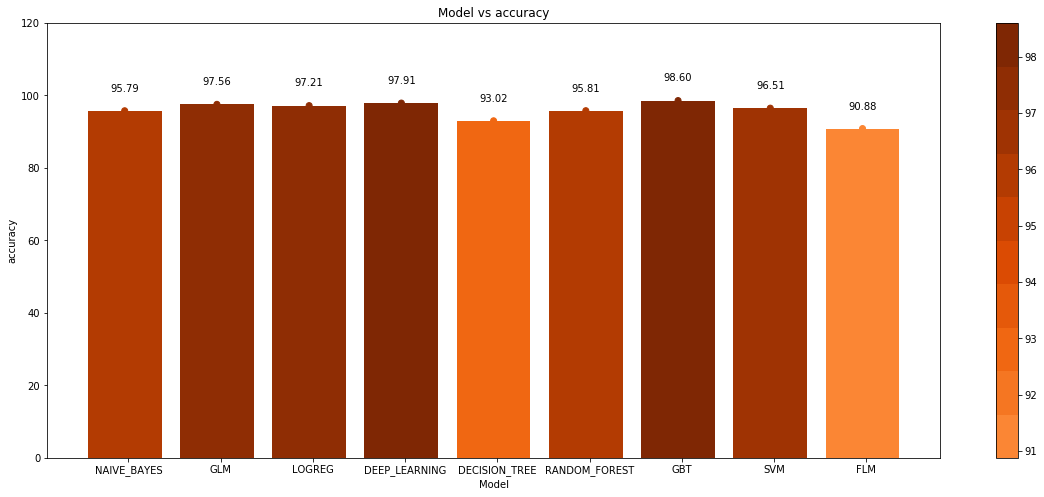

In [22]:
client.plotBarGraph(jsontoDf, 'Model', 'accuracy', 10, 120, 20,8).show()

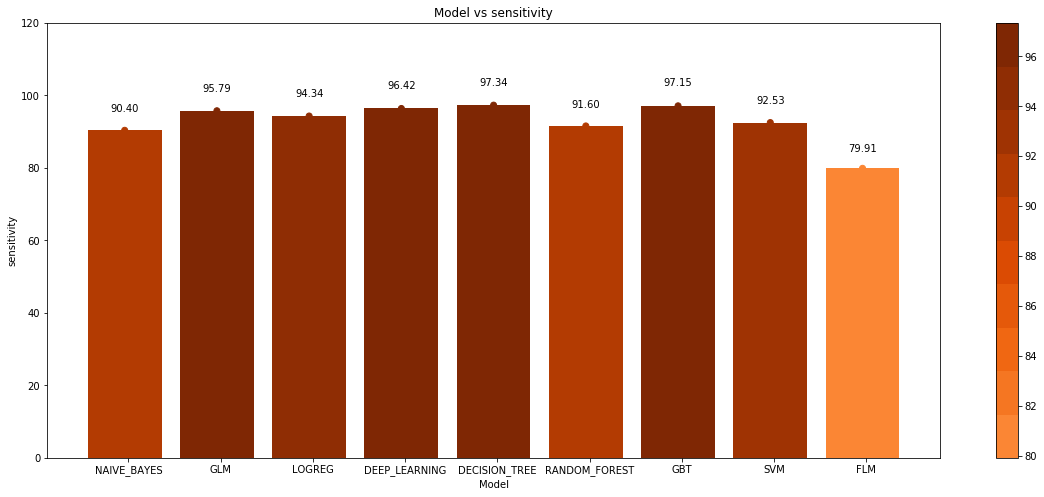

In [23]:
client.plotBarGraph(jsontoDf, 'Model', 'sensitivity', 10, 120, 20,8).show()

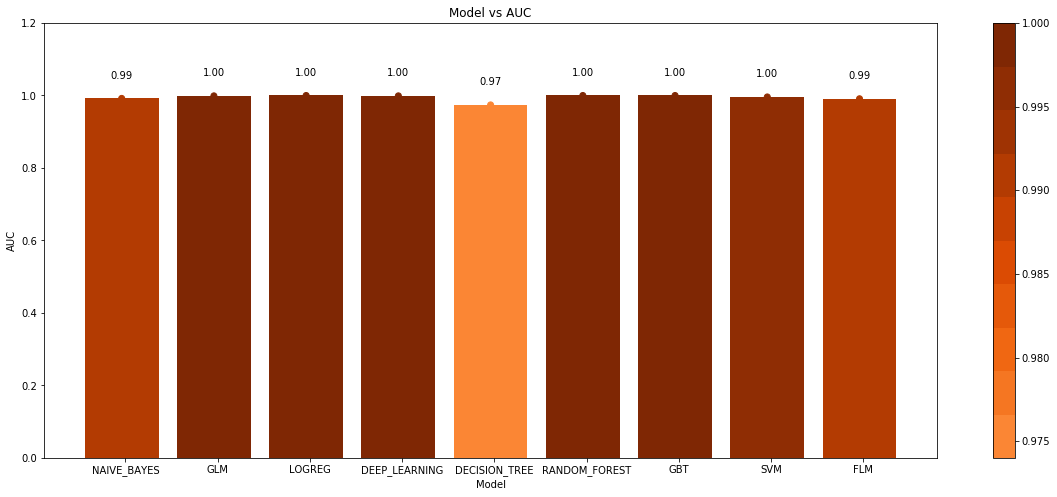

In [24]:
client.plotBarGraph(jsontoDf, 'Model', 'AUC', 10, 1.2, 20,8).show()

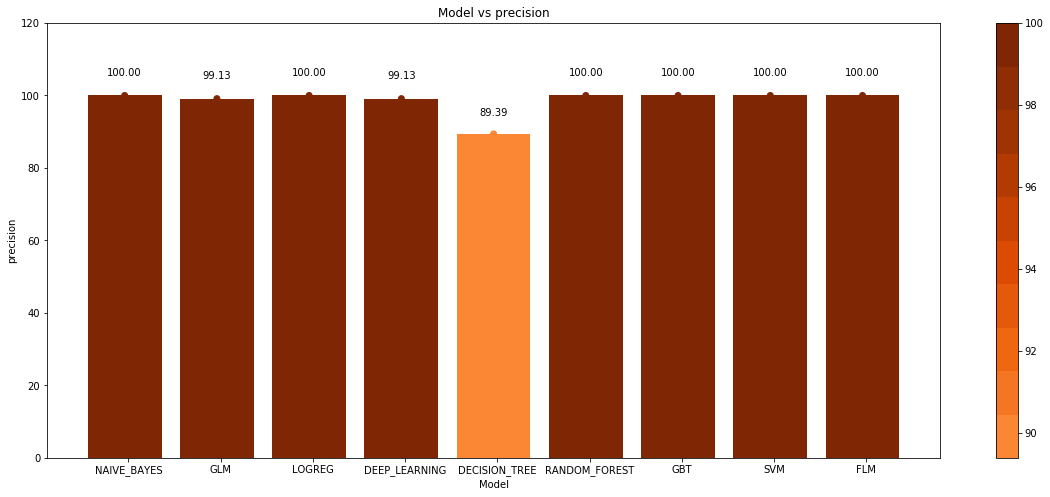

In [25]:
client.plotBarGraph(jsontoDf, 'Model', 'precision', 10, 120, 20,8).show()

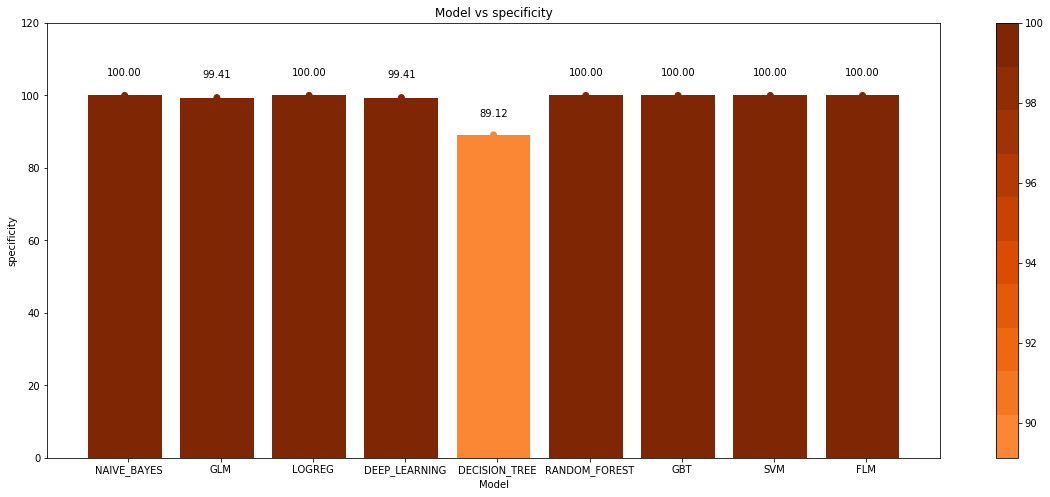

In [26]:
client.plotBarGraph(jsontoDf, 'Model', 'specificity', 10, 120, 20,8).show()

In [27]:
selection_criteria = 'performance_accuracy'
#to get the bests model
bestModel = client.determine_best_model(selection_criteria,max_min_crietria_selector)

Inside determine_best_model function
['performance', 'percentages', 'accuracy']
check model : WEIGHTS
Wrong feature:performance not available in the result
check model : NAIVE_BAYES
95.79
False
check model : GLM
97.56
False
check model : LOGREG
97.21
False
check model : DEEP_LEARNING
97.91
False
check model : DECISION_TREE
93.02
False
check model : RANDOM_FOREST
95.81
False
check model : GBT
98.60
False
check model : SVM
96.51
False
check model : FLM
90.88
False
Exiting determine_best_model function with BestModel:GBT


In [28]:
depID = client.deploy_model(modelingTaskID, bestModel)



Deployed GBT :
 {
    "createdAt": "Mar 25, 2020 9:07:35 PM",
    "displayName": "Predicting FutureCustomer in Deals.json",
    "id": "952d87e0-9d2f-43b7-badd-b55f9589c049",
    "modelType": "GBT",
    "modelingTaskId": "041bc57c-1c3c-4ad8-ba98-2a15d29bf14c",
    "modelingTaskLabel": "FutureCustomer",
    "ownerId": "cf8f9e19-5936-4ff5-9085-283f82f77fc7",
    "url": "/am/api/deployments/952d87e0-9d2f-43b7-badd-b55f9589c049"
}


# Scoring:

In [29]:
test = pd.read_csv("C:\\Users\\VenkateshkumarSivaku\\Desktop\\Interactive data\\Deals-Score.csv")

In [30]:
#dataframe to json
inputScoreData = client.rapidDataFrameToJson(test)

In [31]:
# passing the test data to deployed model to score
scoreResult = client.score(inputScoreData, depID)

In [32]:
PREDICTION = 'prediction(' + LABEL_ATTRIBUTE + ')'
# converting result json to dataframe
result = client.convert_json_to_dataframe(scoreResult['data'])
req = client.convert_json_to_dataframe(inputScoreData)

# List to add the result data
prediction = []

# Number of records in input
max_length = len(req.index)

# Adding confidence and predictions to a list
for i in range(0, max_length):
    prediction.append(result.iloc[i][PREDICTION])
    
test[PREDICTION] = prediction

In [33]:
test

,Row No.,Age,Gender,PaymentMethod,prediction(FutureCustomer)
0,1,64,male,credit card,yes
1,2,35,male,cheque,no
2,3,25,female,credit card,yes
3,4,39,female,credit card,no
4,5,39,male,credit card,yes
...,...,...,...,...,...
995,996,29,female,credit card,yes
996,997,84,male,credit card,no
997,998,20,male,credit card,yes
998,999,19,male,credit card,yes
